# **Petunjuk TTS**

Silakan simpan file ke dalam bentuk **TTS_NIM.ipynb**. Tuliskan koding untuk dapat menampilkan hasil seperti yang diminta. Setelah selesai mengerjakan, silakan unggah ke GClass. Jangan sampai terlambat ya...keterlambatan mengakibatkan pengurangan nilai TTS.

Have fun!

### **1. Import Libraries**

# NIM : 672019023

# Nama : Panca Rizki Perkasa

In [1]:
pip install missingno

In [2]:
# Silakan import librari yang kalian butuhkan (pandas, numpy, matplotlib, seaborn, dan missingno)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [3]:
# Ambil dataset dari (https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true) dan simpan dengan nama variabel data

data = pd.read_csv("airbnb.csv")

In [4]:
# Lihat 5 data teratas pada DataFrame "data"

data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [5]:
# Cek tipe data dalam "data"

data.dtypes


Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

### **2. Membersihkan Data**

**Challenge 1**: Ganti `coordinates` dengan kolom `latitude` dan `longitude`

In [6]:
# Hapus tanda "(" dan ")" dari kolom coordinates

data['coordinates'] = data['coordinates'].str.replace("(","")
data['coordinates'] = data['coordinates'].str.replace(",","")
data['coordinates'] = data['coordinates'].str.replace(")","")


C:\Users\rizky\AppData\Local\Temp/ipykernel_6316/865680591.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace("(","")
C:\Users\rizky\AppData\Local\Temp/ipykernel_6316/865680591.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace(")","")


In [7]:
# Cetak 5 data paling atas dari kolom coordinates

data['coordinates'].head(5)

0    40.63222 -73.93398
1    40.78761 -73.96862
2     40.7007 -73.99517
3    40.79169 -73.97498
4    40.71884 -73.98354
Name: coordinates, dtype: object

In [8]:
# Lakukan split data di kolom coordinates, beri nama lat_long

lat_long = data["coordinates"].str.split(" ", n = 1, expand = True)
lat_long.head(5)

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [9]:
# Buat supaya latitude berisi nilai lat_long[0] dan longitude berisi nilai lat_long[1]

data["latitude"]= lat_long[0]
data["longitude"]= lat_long[1]


In [10]:
# Cetak data

data.head(5)


,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",40.63222 -73.93398,Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",40.78761 -73.96862,Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",40.7007 -73.99517,Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",40.79169 -73.97498,Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",40.71884 -73.98354,Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [11]:
# Konversi nilai latitude dan longitude menjadi FLOAT

data['latitude'] = data['latitude'].astype(float, errors = 'raise')
data['longitude'] = data['latitude'].astype(float, errors = 'raise')


In [12]:
# Cek tipe data sekali lagi

data.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [13]:
# Hapus kolom coordinates

data.drop(columns =["coordinates"], inplace = True)


In [14]:
# Cetak data sekali lagi

data.head(5)

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,40.63222
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,40.78761
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,40.70070
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,40.79169
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,40.71884


**Challenge 2**: Hapus `$` dari kolom `price` dan konversi ke `float`

In [15]:
# Hapus tanda dolar ($) dari kolom price sebelum nantinya akan kita konversi ke tipe data FLOAT

data['price'] = data['price'].str.replace("$","")


C:\Users\rizky\AppData\Local\Temp/ipykernel_6316/754644066.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace("$","")


In [16]:
# Cetak untuk melihat apakah sudah terjadi perubahan pada kolom price
data['price'].head(5)

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [17]:
# Konversi kolom price ke bentuk FLOAT

data['price'] = data['price'].astype(float, errors = 'raise')
data.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
room_type              object
price                 float64
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [18]:
# Hitung nilai mean dari kolom price setelah dikonversi

data["price"].mean()


150.90512217564665

C:\Users\rizky\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

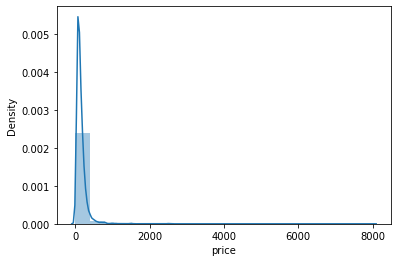

In [19]:
# Buat visualisasi distribusi dari kolom prices

sns.distplot(data['price'], bins = 20)
plt.plot()

**Challenge 3**: Kita buat supaya kolom `room_type` benar-benar rapi secara kategori.

In [20]:
# Cetak supaya tahu kategori apa saja yang ada di kolom `room_type`

data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [21]:
# Buat supaya semua berubah menjadi huruf kecil

data['room_type'] = data['room_type'].str.lower()
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [22]:
# Buat supaya tidak ada spasi di awal dan akhir

data['room_type'] = data['room_type'].str.strip()
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [23]:
# Ganti menjadi kategori 'Shared room', 'Entire place', 'Private room' dan 'Hotel room'

mapping = { 'private room': 'Private Room',
           'private': 'Private Room',
           'entire home/apt': 'Entire place',
           'share room': 'Share room',
           'hotel': 'Hotel room'
          }

for key in mapping.keys():
    data['room_type'] = data['room_type'].str.replace(key, mapping[key])



In [24]:
# Cek 5 data teratas untuk melihat perubahan yang terjadi

data['room_type'].head(5)

0    Private Room
1    Entire place
2    Entire place
3    Entire place
4    Private Room
Name: room_type, dtype: object

**Challenge 4**: Kita bersihkan **missing data**

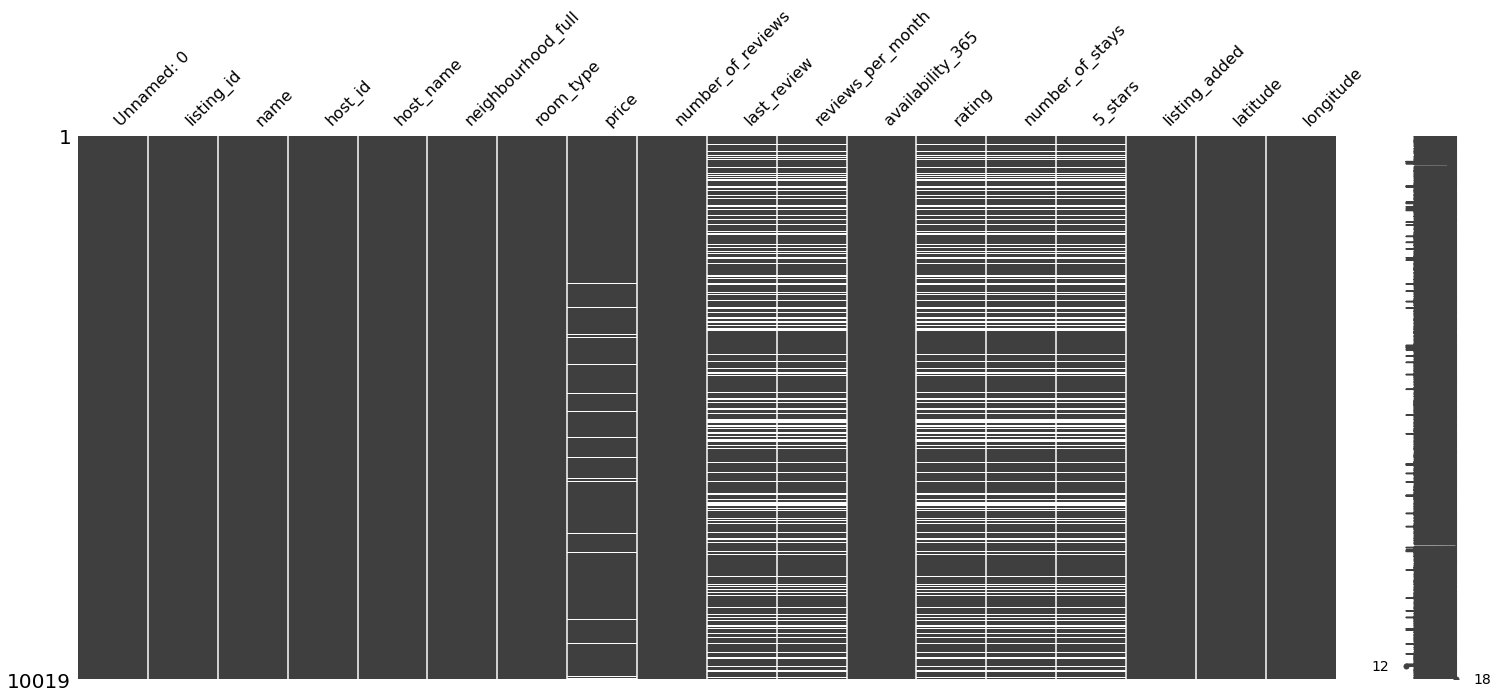

In [37]:
# Visualisasi missingness 

msno.matrix(data)
plt.show()


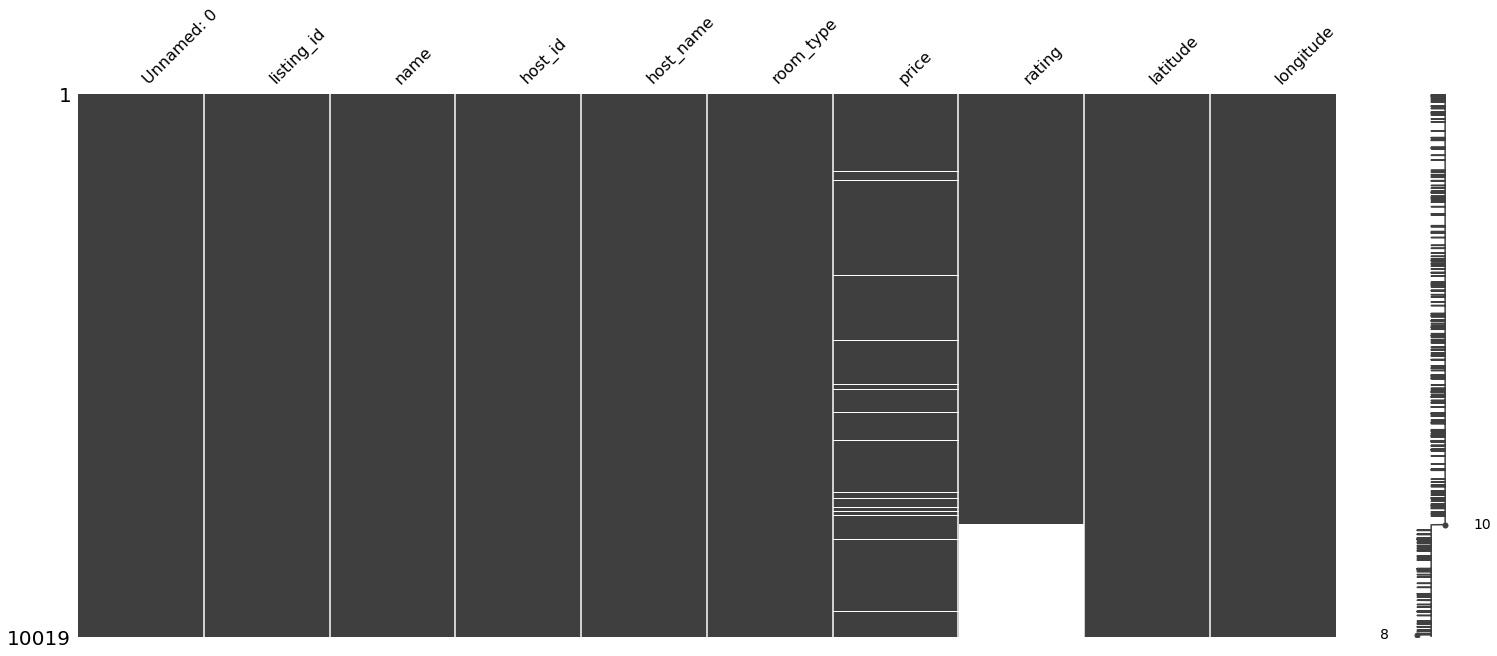

In [45]:
# Visualisasikan missingness berdasarkan rating

msno.matrix(data.sort_values(by = 'rating'))
plt.show()

<AxesSubplot:>

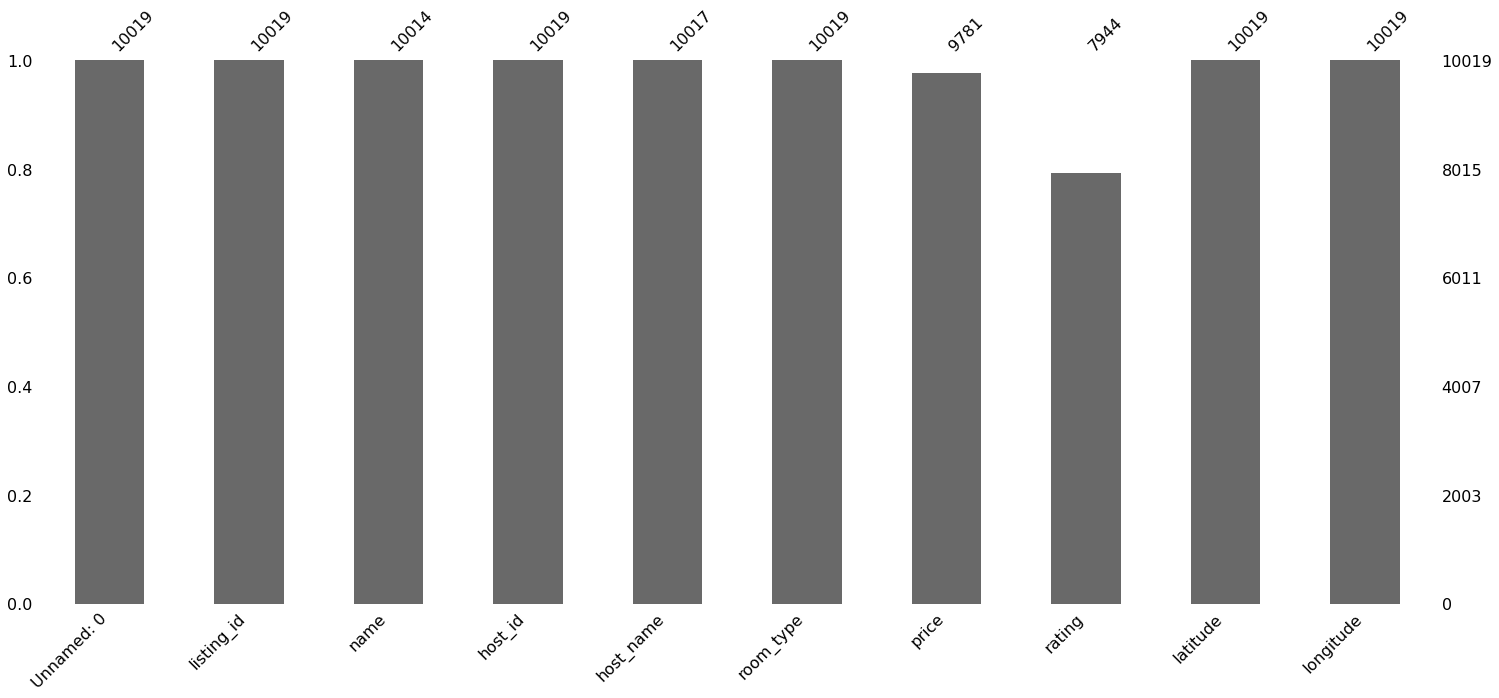

In [46]:
# Buat dalam bentuk barplot
msno.bar(data)


In [47]:
# Cek DataFrame yang ada missing values di kolom rating, number_of_stays, 5_stars, reviews_per_month
data[data['rating'].isna()].describe()

,Unnamed: 0,listing_id,host_id,price,rating,latitude,longitude
count,2075.000000,2.075000e+03,2.075000e+03,2028.000000,0.0,2075.000000,2075.000000
mean,4983.181205,2.274238e+07,8.022455e+07,191.553748,NaN,40.732074,40.732074
std,2874.009469,1.123730e+07,8.663163e+07,316.186639,NaN,0.051168,0.051168
min,2.000000,6.358800e+04,1.475100e+04,0.000000,NaN,40.527000,40.527000
25%,2461.500000,1.232923e+07,1.224305e+07,70.000000,NaN,40.697845,40.697845
50%,4987.000000,2.345182e+07,4.040116e+07,120.000000,NaN,40.727790,40.727790
75%,7390.000000,3.400364e+07,1.333498e+08,205.250000,NaN,40.763480,40.763480
max,10007.000000,3.648724e+07,2.741034e+08,5250.000000,NaN,40.911690,40.911690


In [48]:
# Lakukan imputasi untuk missing data

data = data.fillna({'reviews_per_month' : 0,
                    'number_of_stays' :0,
                    '5_stars' :0
                   })

In [49]:
# Buat kolom baru, beri nama sudah_dinilai

sudah_dinilai = np.where(data['rating'].isna() == True, 0,1)
data['sudah_dinilai'] = sudah_dinilai


In [50]:
# Cek data
data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,rating,latitude,longitude,sudah_dinilai
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,4.100954,40.63222,40.63222,1
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,3.367600,40.78761,40.78761,1
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,NaN,40.70070,40.70070,0
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,4.763203,40.79169,40.79169,1
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,3.822591,40.71884,40.71884,1


**Challenge 5**: Hapus kolom-kolom berikut


1.   neighbourhood_full
2.   number_of_reviews
3.   last_review
4.   reviews_per_month
5.   availability_365
6.   number_of_stays
7.   5_stars
8.   listing_added









In [41]:
# Hapus beberapa kolom yang tidak dibutuhkan

data.drop(columns =["neighbourhood_full", "number_of_reviews", 'last_review', 'reviews_per_month', 'availability_365', 'number_of_stays', '5_stars', 'listing_added' ], inplace = True)

In [43]:
# Tampilkan data

data.head(5)

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,rating,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,4.100954,40.63222,40.63222
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,3.367600,40.78761,40.78761
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,NaN,40.70070,40.70070
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,4.763203,40.79169,40.79169
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,3.822591,40.71884,40.71884
